## What is Naive Bayes?
Naive Bayes,the original meaning of Naive here is naive, often with a little derogatory taste, and it is used in the name of this algorithm to translate it into simplicity, which can also be called a kind of tolerance. Another keyword, Bayesian, is because the main theoretical basis of the Naive Bayesian algorithm is the Bayesian theorem, so this article first introduces the Bayesian theorem, and then leads to the basic ideas and principles of the Naive Bayesian algorithm

Bayes theorem is generally used to solve the posterior probability, the core formula is:

P(A|B) is called the posterior probability, which is the target to be sought
P(A) is the prior probability, which is generally obtained from a large amount of data statistics, and can also be provided based on experience when the amount of data is small
P(B|A) is the conditional probability, which can be obtained according to a large amount of data statistics. It is generally given by the method of maximum likelihood estimation, and it actually belongs to the prior probability
In fact, P(B) also belongs to the prior probability, and only involves a single variable, so it is similar to P(A), and can also be obtained from statistics, but because P(B) is independently in the denominator in Bayesian theorem In , the size of its specific value will not affect the determination result of the maximum posterior probability, and generally no calculation is required. 

## Naïve Bayes (NB) in Python with Labeled Text Data

In this section, I used Naive Bayes to predict sentiment analysis for test data Naive Bayes is a classification method based on Bayes’ Theorem and the assumption of predictor independence. It performs well in the case of categorical input variables compared to the numerical variables. I want to predict result which are negative, neutral, positive by using naive bayes. 

First, split the dataset into train and test


Second, train Multinomial Naive Bayes model to predict text in x_test and calculate the accuracy


Finally, Make several visualizations and gather a conclusion. 

##### Load required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

##### Import and split the data 

In [5]:
tweettext = pd.read_csv("../data/01-modified-data/pytweetresult.csv")
tweettext.head()

,Unnamed: 0,text,result,scores
0,0,A more memorable connection is one that respec...,Positive,15.4
1,1,A more memorable connection is one that respec...,Positive,15.4
2,2,RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...,Negative,24.2
3,3,@jay_scherrer @muskQu0tes @elonmusk Elon Musk ...,Negative,14.0
4,4,@DanKnightMMA Dear Dan - you seem like an enga...,Positive,26.0


In [6]:
x_train,x_test,y_train,y_test=train_test_split(tweettext['text'],tweettext['result'],test_size=0.2)

Since when we use Naive Bayes, we need to tranfer y(label data) into numeric column. As a result, LabelEncoder can greatly help us to tranform Y_train, Y_test value into 0,1,2 in order to simpler utilize Naive Bayes to calculate the result. 

In [7]:
Encoder = LabelEncoder()
Y_train = Encoder.fit_transform(y_train) #Transform Y_train, Y_test value into 0,1,2
Y_test= Encoder.fit_transform(y_test)

In [8]:
x_train.head()

557    Consumer privacy predictions—how marketers wil...
200    A more memorable connection is one that respec...
302    RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...
944    @elonmusk \n“But if Apple forsakes consumer pr...
594    FCC Acts To Protect Consumer Privacy From Unwa...
Name: text, dtype: object

In [9]:
x_test.head()

973     Consumer privacy predictions—how marketers wil...
1246    Decentralized Identity: A New Era of Consumer ...
306     U.S. State Consumer Privacy Laws – a short 5-m...
531     RT @GRAUSAFL: Consumer Privacy in Retail from ...
345     Have you ever heard of self-sovereign distribu...
Name: text, dtype: object

##### Naive Bayes Classification

There are three types of Bayesian classifiers, namely Multinomial Naive Bayes, Binarized Multinomial Naive Bayes, and Bernoulli Naive Bayes. This article describes the first Bayesian classifier, which is mainly used for text topic classification. In Multinomial Naive Bayes, the number of times a word appears, that is, term frequency (term frequency); and the second type—Binarized Multinomial Naive Bayes—does not consider word frequency, but only considers whether the word appears, and is mainly used for text sentiment analysis. For example, if a piece of text mentions the word bad, using the second classifier will not consider how many times bad appears, it only pays attention to whether bad appears.

For text classification, it is more suitable to use multinomial Naive Bayes Model. I built a model to fit x_train and Y_train, then make a prediction for x_test to determine whether Naive Bayes is a suitable model for sentiment analysis of prediction. 

In [10]:
#Use multinomial Naive Bayes model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train,Y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred, Y_test)*100)

Accuracy:  99.23076923076923


Text(0.5, 1.0, 'predicted vs true')

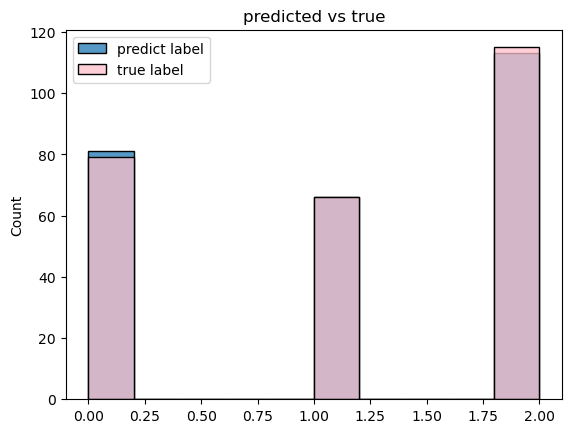

In [11]:
newdf = pd.DataFrame(y_pred)
sns.histplot(y_pred)
sns.histplot(Y_test,color='pink')
plt.legend(labels=["predict label","true label"])
plt.title("predicted vs true")

From this plot, we can see the true labels are nearly as similar as predicted label. There is a few misclassification here. In the neutral column and positive column which are 1 and 2, there are a few misclassifications. But we can conclude that naive bayes is a good model here. We can enlarge train data in order to avoid some misclassifications. 

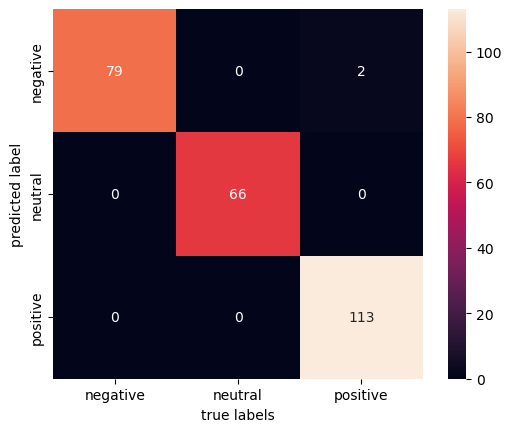

In [12]:
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",yticklabels = ['negative','neutral','positive'], xticklabels= ['negative','neutral','positive'])
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In the heatmap shows above, it clearly shows the attitude distribution which are negative, neutral, positive between true labels and predicted labels. As we can see, the misclassification is low. 

##### Further prediction for using Naive Bayes to predict scores of each text
From previous dataset, it not only defined attitude of each text, it also defined scores for each text. I would like to figure our whether a Naive Bayes Model is suitable for predict scores of each text. 


First, calculate the frequencies of each scores and trying to bin them into different range


Second, split the dataset into train and test


Third, train Multinomial Naive Bayes model to predict text in x_test and calculate the accuracy


Finally Make several visualizations and gather a conclusion. 

In [20]:
freq = tweettext['scores'].value_counts().rename_axis('scores').reset_index(name='counts')

Text(0.5, 1.0, 'Distribution of scores')

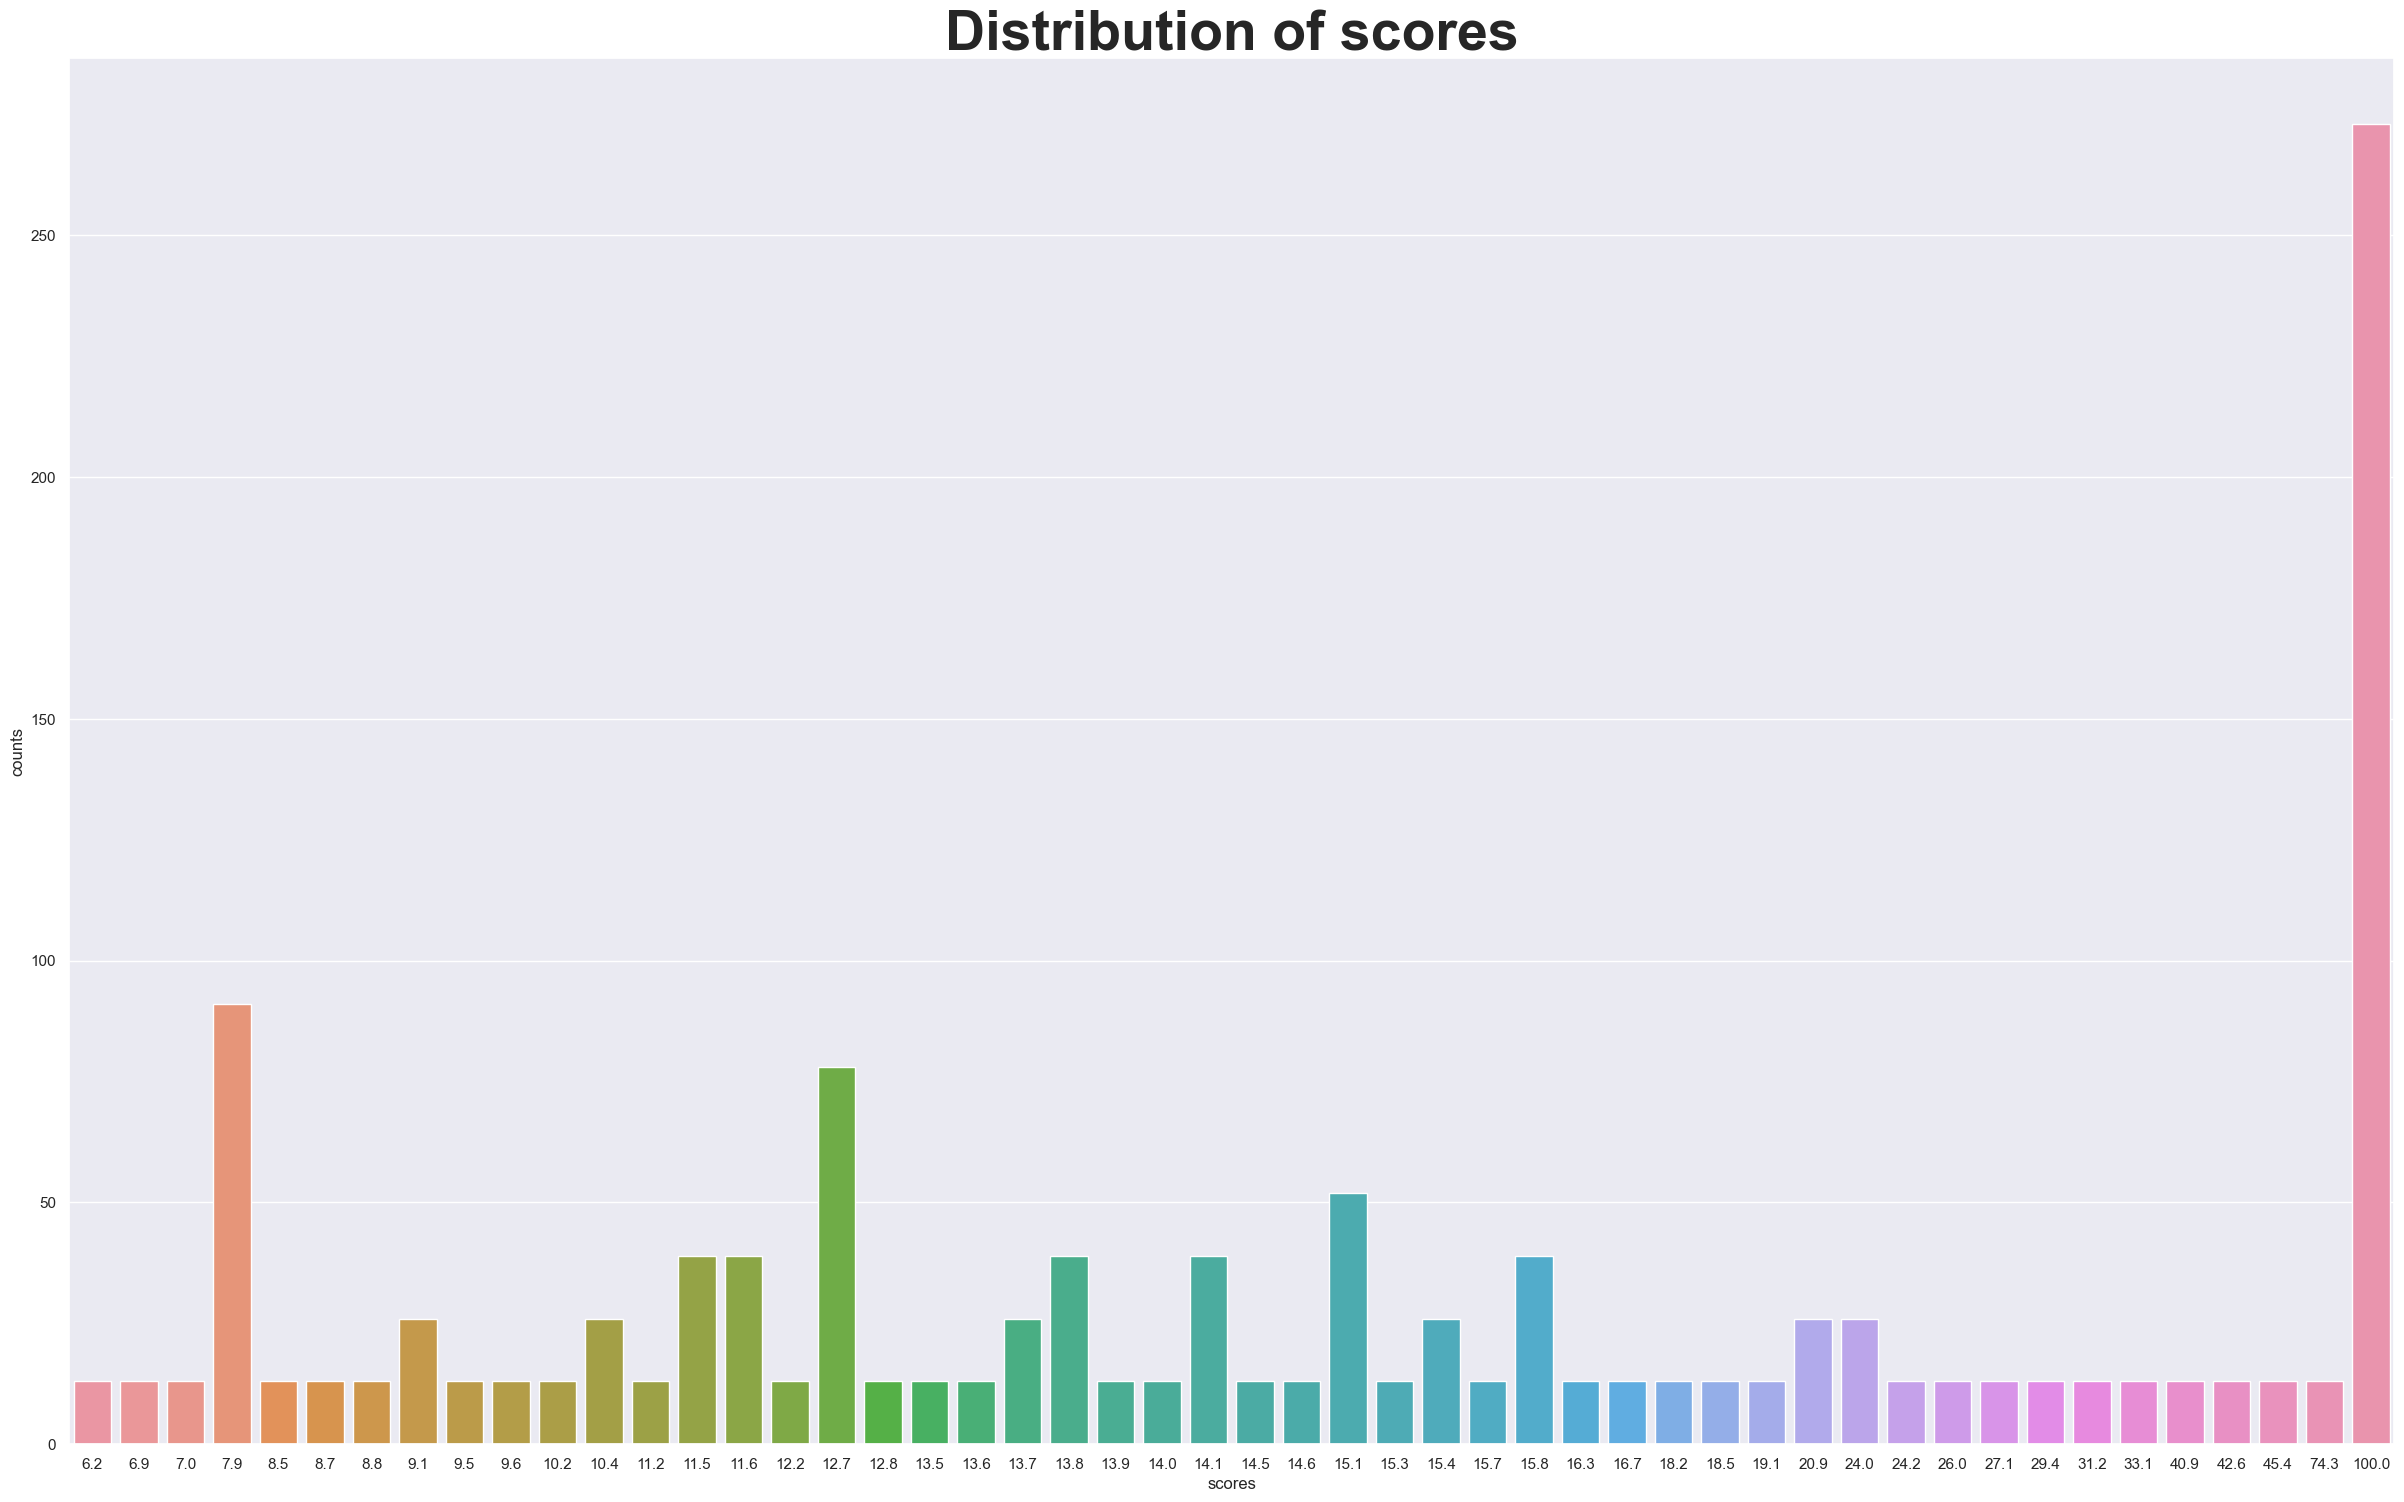

In [22]:
sns.set(rc={'figure.figsize':(30,18)})
freqplot = sns.barplot(x=freq.scores, y=freq.counts)
freqplot.set_title("Distribution of scores",fontdict= { 'fontsize': 40,'fontweight':'bold'})

From the plot, it clearly shows the distribution of each scores. At this time, because there are so many ranges of scores , we need to bin them

We classified each score to 5 ranges

First, we can find the max and min values of scores

We can use the linspace() function of the numpy package to calculate the 6 bins, equally distributed.

In [23]:
min_value = tweettext['scores'].min()
max_value = tweettext['scores'].max()
print(min_value)
print(max_value)

6.2
100.0


In [24]:
bins = np.linspace(min_value,max_value,4)
bins

array([  6.2       ,  37.46666667,  68.73333333, 100.        ])

Now we define the labels and We can use the cut() function to convert the numeric values of the scores into the categorical values. We need to specify the bins and the labels. In addition, we set the parameter include_lowest to True in order to include also the minimum value.

In [28]:
labels = ['low','medium','high']
tweettext['scoresrange'] = pd.cut(tweettext['scores'], bins=bins, labels=labels, include_lowest=True)
tweettext['scoresrange'].head()

0    low
1    low
2    low
3    low
4    low
Name: scoresrange, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

##### Split datset into train and test and Train Naive Bayes

In [29]:
x_train,x_test,y_train,y_test=train_test_split(tweettext['text'],tweettext['scoresrange'],test_size=0.2)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train,Y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred, Y_test)*100)

Accuracy:  36.53846153846153


The accuracy is low here, so we can predict that the Naive Bayes is not suitable for predict scores in each text. 

Text(0.5, 1.0, 'predicted vs true')

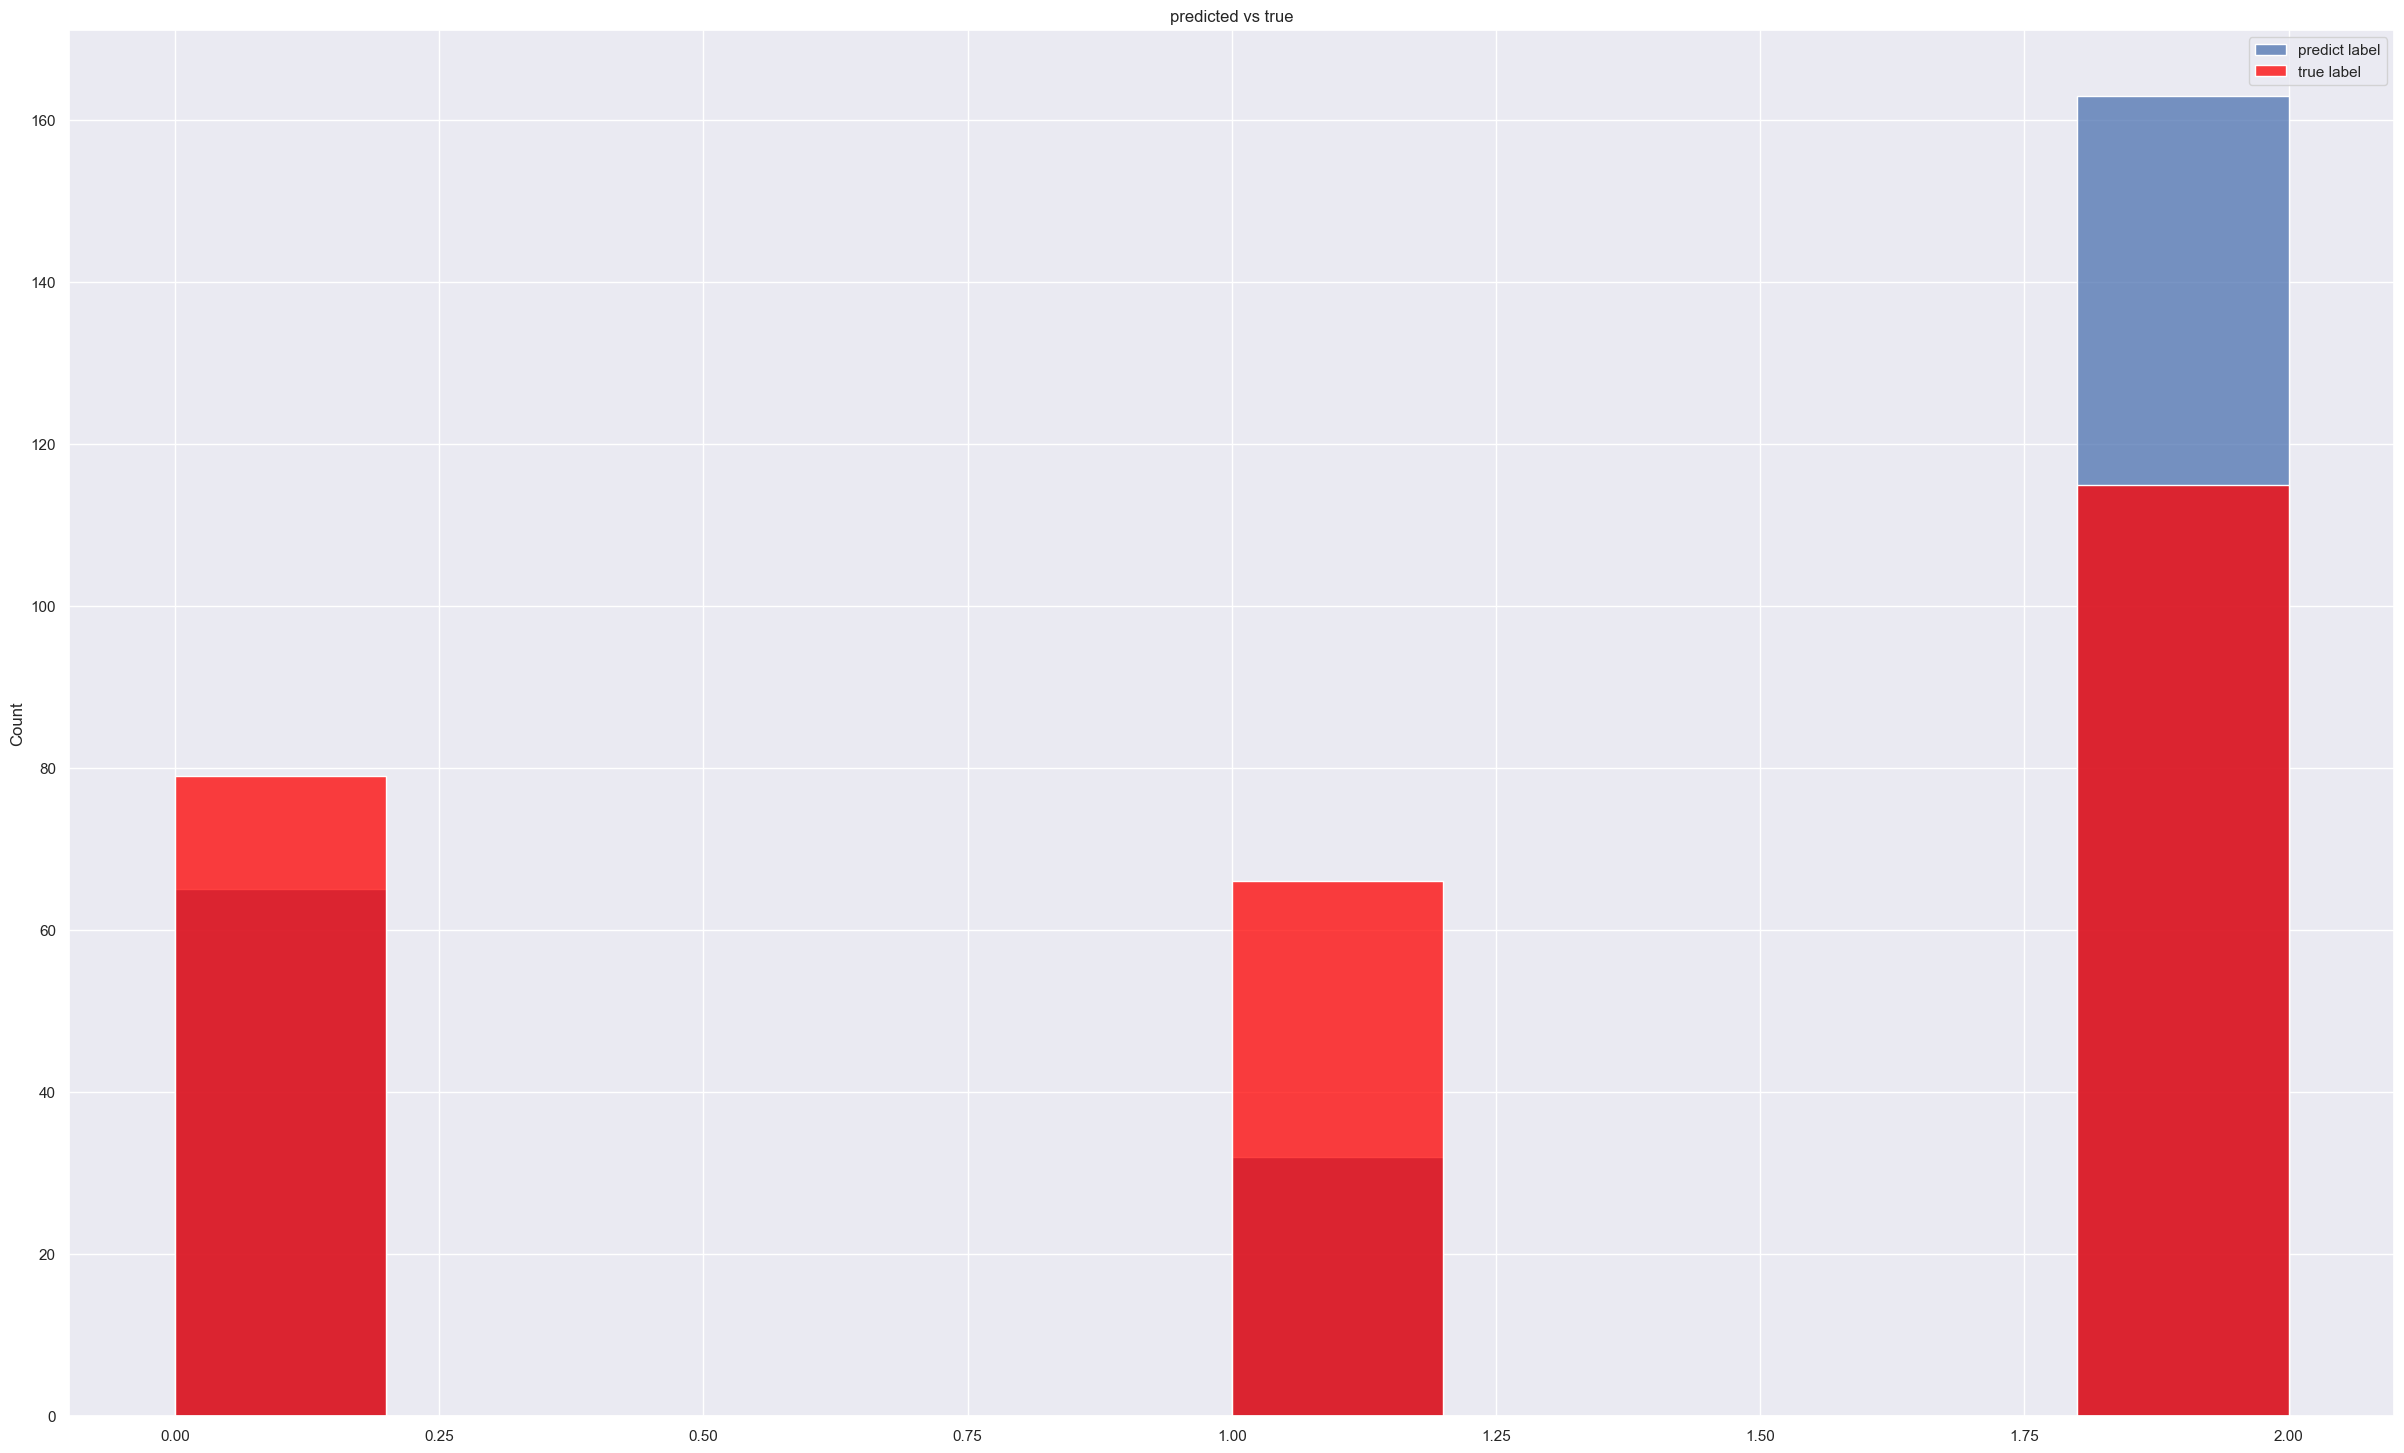

In [30]:
newdf = pd.DataFrame(y_pred)
sns.histplot(y_pred)
sns.histplot(Y_test,color='red')
plt.legend(labels=["predict label","true label"])
plt.title("predicted vs true")

As the plot shows, there are a lot of misclassification during the Naive baye prediction. 

#### Conclusion
Naive Bayes in here is a great model to predict sentiment attitude. As we can see, the accuracy score is about 99. It means we only have about 2.5% misclassification. This can leads us to conclude that the attitude variable is independent. The Naive Bayes classifier is much faster with its probability calculations. This is the kind of algorithm used when all features follow a normal distribution. All features are continuous valued. The assumption is that there is no covariance between the independent features. We can further this model to analysis bigger dataset's sentiment. In the following research, I will utilize more twitter api to gather the customers' attitudes about consumer privacy, at this time, the naive bayes can be a useful tool to predict that. 

However, for the further prefiction of each text's score, the Naive Bayes is not a good model for prediction. I will try different model to predict that. 

## Naive Bayes in R
In this section, I used Naive Bayes to identify the relationship between influence scores and different factors of being a instagram influencer. Naive Bayes is a classification method based on Bayes’ Theorem and the assumption of predictor independence. It performs well in the case of categorical input variables compared to the numerical variables. 

##### Load required packages

In [1]:
#import required packages
library(e1071)
library(caTools)
library(caret)
library(plotly)
library(dplyr)
library(ggplot2)
library(psych)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




##### Load the required dataset

In [3]:
data = read.csv("../data/01-modified-data/instagram_infl.csv")
head(data)

,X,rank,channel_info,influence_score,posts.k.,followers.m.,X60_day_eng_rate...,new_post_avg_like.m.,total_likes.b.,country,avg_likes
,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,1,cristiano,92,3.30,475.8,1.39,6.5,29.0,Spain,8700000
2,2,2,kyliejenner,91,6.90,366.2,1.62,5.9,57.4,United States,8300000
3,3,3,leomessi,90,0.89,357.3,1.24,4.4,6.0,Undefined,6800000
4,4,4,selenagomez,93,1.80,342.7,0.97,3.3,11.5,United States,6200000
5,5,5,therock,91,6.80,334.1,0.20,665.3,12.5,United States,1900000
6,6,6,kimkardashian,91,5.60,329.2,0.88,2.9,19.9,United States,3500000


The dataset contains 11 columns. 

influence score: It is calculated based on their popularity.

posts: total posts they have

followers: total followers they have

avg_likes: average likes of their total posts

60_days_eng_rate: 60 days of engagement rate

new_post_avg_like: a calculation of the average likes they gained from new posts. 

total_likes: total likes of their posts in instagram.

country: users' origin. What countries they from?

##### Identify frequencies
At this time, I want to calculate the distribution of influence scores. 

In [4]:
xtabs(~data$influence_score, data = data)

data$influence_score
22 41 42 47 57 58 63 68 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 
 1  1  2  1  1  1  1  1  1  1  1  2  3  4  6  4  6  6 12  9 12 20 17 30 19  9 
88 89 90 91 92 93 
 7  4  7  6  4  1 

Because there are so many scores in this datasets, It is more workable to take them into different bins like 0-75, 70-100 to identify the influence scores are high or low

In [7]:
data <- data %>% mutate(new_bin = cut(influence_score, breaks=c(0,77,84,100)))#cut influence scores into different bins
data$new_bin <- as.character(data$new_bin)

data$new_bin[data$new_bin=="(0,77]"]<-"low"
data$new_bin[data$new_bin=="(77,84]"]<-"medium"
data$new_bin[data$new_bin=="(84,100]"]<-"high"
# Catergorized scores between 0-60 as low scores, 60-85 as medium scores,85-100 as high scores
data$new_bin <- as.factor(data$new_bin) # Factorize the column new_bin for futher classification
head(data)

,X,rank,channel_info,influence_score,posts.k.,followers.m.,X60_day_eng_rate...,new_post_avg_like.m.,total_likes.b.,country,avg_likes,new_bin
,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
1,1,1,cristiano,92,3.30,475.8,1.39,6.5,29.0,Spain,8700000,high
2,2,2,kyliejenner,91,6.90,366.2,1.62,5.9,57.4,United States,8300000,high
3,3,3,leomessi,90,0.89,357.3,1.24,4.4,6.0,Undefined,6800000,high
4,4,4,selenagomez,93,1.80,342.7,0.97,3.3,11.5,United States,6200000,high
5,5,5,therock,91,6.80,334.1,0.20,665.3,12.5,United States,1900000,high
6,6,6,kimkardashian,91,5.60,329.2,0.88,2.9,19.9,United States,3500000,high


##### Split dataset into train and test

In [8]:
split <- sample.split(data, SplitRatio = 0.8)
train <- subset(data, split == "TRUE")
test <- subset(data, split == "FALSE")
train <- subset(train,select = -c(X,channel_info,country,rank,influence_score)) #Drop columns which are not required
test <- subset(test,select = -c(X,channel_info,country,rank,influence_score))

In [9]:
head(train)

,posts.k.,followers.m.,X60_day_eng_rate...,new_post_avg_like.m.,total_likes.b.,avg_likes,new_bin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3.30,475.8,1.39,6.5,29.0,8700000,high
2,6.90,366.2,1.62,5.9,57.4,8300000,high
3,0.89,357.3,1.24,4.4,6.0,6800000,high
4,1.80,342.7,0.97,3.3,11.5,6200000,high
6,5.60,329.2,0.88,2.9,19.9,3500000,high
7,5.00,327.7,1.20,3.9,18.4,3700000,high


In [10]:
head(test)

,posts.k.,followers.m.,X60_day_eng_rate...,new_post_avg_like.m.,total_likes.b.,avg_likes,new_bin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,6.80,334.1,0.20,665.3,12.5,1900000,high
11,0.66,254.0,2.04,5.1,3.7,5500000,high
12,10.00,237.0,0.07,159.3,3.0,302200,high
17,6.40,201.6,0.53,1.0,13.5,2100000,high
23,3.50,150.7,3.17,4.8,20.6,5800000,high
24,1.60,140.5,1.10,1.5,5.0,3100000,low


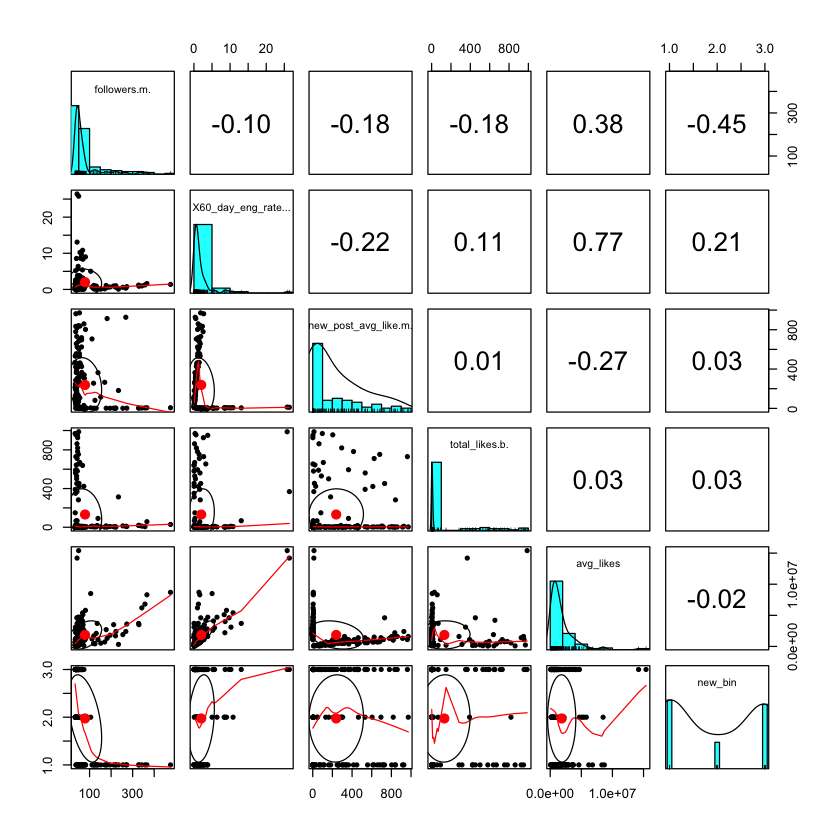

In [11]:
pairs.panels(train[-1])

Through this plot, we can get the first direct insight of this dataset.

##### Naive Bayes Classification

In [12]:
model <- naiveBayes(new_bin ~ ., data = train, usekernel = T) 

In [13]:
y_pred <- predict(model, newdata = test)
conf_mat <- table(test$new_bin,y_pred) 
confusionMatrix(conf_mat) 

Confusion Matrix and Statistics

        y_pred
         high low medium
  high     11   1     10
  low       1   2      3
  medium    4   3     14

Overall Statistics
                                          
               Accuracy : 0.551           
                 95% CI : (0.4023, 0.6933)
    No Information Rate : 0.551           
    P-Value [Acc > NIR] : 0.5589          
                                          
                  Kappa : 0.2545          
                                          
 Mcnemar's Test P-Value : 0.4625          

Statistics by Class:

                     Class: high Class: low Class: medium
Sensitivity               0.6875    0.33333        0.5185
Specificity               0.6667    0.90698        0.6818
Pos Pred Value            0.5000    0.33333        0.6667
Neg Pred Value            0.8148    0.90698        0.5357
Prevalence                0.3265    0.12245        0.5510
Detection Rate            0.2245    0.04082        0.2857
Detection Preval

##### Build a heatmap for visualization

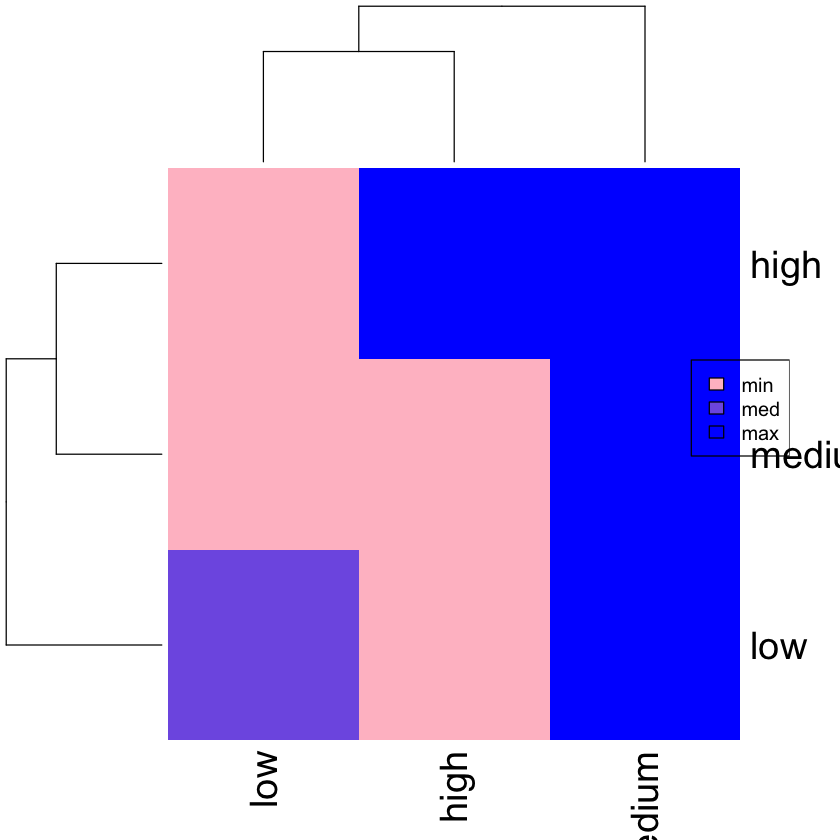

In [16]:
my_colors <- colorRampPalette(c("pink", "blue"))
heatmap(conf_mat,col = my_colors(3))
legend(x="right",legend = c("min", "med", "max"),fill = my_colors(3))

##### Conclusion
As we can see in the confusion matrix, The accuracy is only low for prediction. At this time, Naive Bayes is not a good model for this dataset. In naive Bayes algorithm, we calculate the conditional probability of the events given class label. However in testing data, if some new event comes up then the conditional probability will be zero for the entire term. As a result, it is may be not useful for this dataset because other variables don't give a great prediction for influencers' scores. Influencer score may be not a independent variable. 

##### Train another model in the same plots

At this time, I want to total likes amount to train influence model too determine whether there are other interrupted variables lower the accuracy

Confusion Matrix and Statistics

        y_pred
         high low medium
  high     19   0      3
  low       4   0      2
  medium   15   0      6

Overall Statistics
                                          
               Accuracy : 0.5102          
                 95% CI : (0.3634, 0.6558)
    No Information Rate : 0.7755          
    P-Value [Acc > NIR] : 0.999988        
                                          
                  Kappa : 0.1184          
                                          
 Mcnemar's Test P-Value : 0.002905        

Statistics by Class:

                     Class: high Class: low Class: medium
Sensitivity               0.5000         NA        0.5455
Specificity               0.7273     0.8776        0.6053
Pos Pred Value            0.8636         NA        0.2857
Neg Pred Value            0.2963         NA        0.8214
Prevalence                0.7755     0.0000        0.2245
Detection Rate            0.3878     0.0000        0.1224
Detection Preval

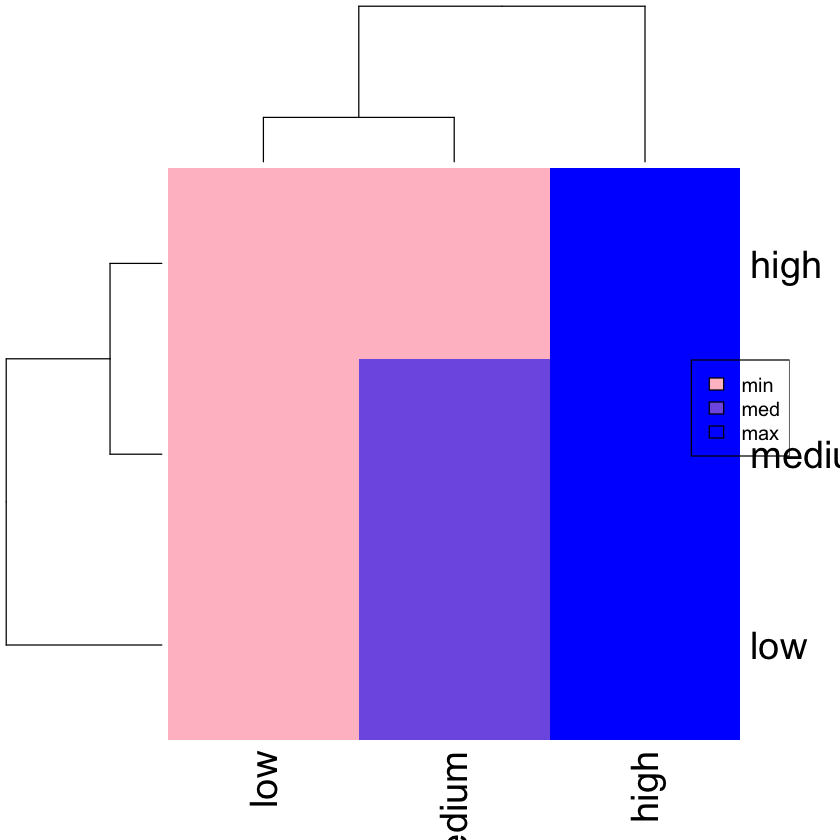

In [18]:
model <- naiveBayes(new_bin ~ total_likes.b., data = train, usekernel = T) 
y_pred <- predict(model, newdata = test)
conf_mat <- table(test$new_bin,y_pred) 
confusionMatrix(conf_mat) 

my_colors <- colorRampPalette(c("pink", "blue"))
heatmap(conf_mat,col = my_colors(3))
legend(x="right",legend = c("min", "med", "max"),fill = my_colors(3))

##### Conclusion
Because the accuracy is still low at this time, we can conclude that Naive Bayes is not suitable for this model. 

##### Reference
Wikimedia Foundation. (2022, October 29). Naive Bayes classifier. Wikipedia. Retrieved December 1, 2022, from https://en.wikipedia.org/wiki/Naive_Bayes_classifier 